# Analyzing OR Blood Pressure Measurements

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import os
import time
import datetime
import numpy as np
DATADIR = os.path.join(os.path.expanduser('~'),"DATA", "TimeSeries", "UofUData")
os.path.exists(DATADIR)

True

In [3]:
data = pd.read_csv(os.path.join(DATADIR,"data_all.csv"), nrows=1000)

In [4]:
data.head()

,Unnamed: 0,VirtualCaseID,VirtualPatientID,AIMS_Patient_Age_Years,AIMS_sex,Numeric_Proced_Code,VirtualDateTime,noninvDIA,noninvMAP,noninvSYS,invDIA,invMAP,invSYS
0,1,10349,8114,50,F,99232.0,1986-01-18 11:38:00,NaN,NaN,NaN,40,70,84
1,2,10349,8114,50,F,99232.0,1986-01-18 11:39:00,NaN,NaN,NaN,56,73,93
2,3,10349,8114,50,F,99232.0,1986-01-18 11:40:00,64.0,77.0,96.0,55,72,97
3,4,10349,8114,50,F,99232.0,1986-01-18 11:41:00,NaN,NaN,NaN,63,82,109
4,5,10349,8114,50,F,99232.0,1986-01-18 11:42:00,NaN,NaN,NaN,63,82,108


In [6]:
data.shape

(1000, 13)

In [10]:
data.dtypes

Unnamed: 0                  int64
VirtualCaseID               int64
VirtualPatientID            int64
AIMS_Patient_Age_Years      int64
AIMS_sex                   object
Numeric_Proced_Code       float64
VirtualDateTime            object
noninvDIA                 float64
noninvMAP                 float64
noninvSYS                 float64
invDIA                      int64
invMAP                      int64
invSYS                      int64
dtype: object

In [13]:
type(data["noninvDIA"][0])
np.nan

nan

In [14]:
t0 = data["VirtualDateTime"][0]
print(t0)
print(type(t0))


1986-01-18 11:38:00
<class 'str'>


## Convert ``VirtualDataTime`` from string to datetime

### Define parse string

In [15]:
"1986-01-18 11:38:00"
parse_str = "%Y-%m-%d %H:%M:%S"

### Test parse string

In [16]:
print(time.strftime(parse_str, time.localtime()))
time.strptime(t0, parse_str)

2017-07-07 20:56:13


time.struct_time(tm_year=1986, tm_mon=1, tm_mday=18, tm_hour=11, tm_min=38, tm_sec=0, tm_wday=5, tm_yday=18, tm_isdst=-1)

### Create datetime

In [17]:
print(datetime.datetime.strptime(t0, parse_str))
print(type(datetime.datetime.strptime(t0, parse_str)))

1986-01-18 11:38:00
<class 'datetime.datetime'>


In [18]:
def datestring_to_datetime(s, parse_str):
    try:
        return datetime.datetime.strptime(s, parse_str)
    except:
        return np.nan

In [19]:
type(datestring_to_datetime(t0, parse_str))

datetime.datetime

In [20]:
datestring_to_datetime(t0, parse_str)

datetime.datetime(1986, 1, 18, 11, 38)

### Modify DataFrame

In [21]:
data["VirtualDateTime Parsed"] = \
data.apply(lambda x: datetime.datetime.strptime(x["VirtualDateTime"], parse_str), axis=1)
data.head()

,Unnamed: 0,VirtualCaseID,VirtualPatientID,AIMS_Patient_Age_Years,AIMS_sex,Numeric_Proced_Code,VirtualDateTime,noninvDIA,noninvMAP,noninvSYS,invDIA,invMAP,invSYS,VirtualDateTime Parsed
0,1,10349,8114,50,F,99232.0,1986-01-18 11:38:00,NaN,NaN,NaN,40,70,84,1986-01-18 11:38:00
1,2,10349,8114,50,F,99232.0,1986-01-18 11:39:00,NaN,NaN,NaN,56,73,93,1986-01-18 11:39:00
2,3,10349,8114,50,F,99232.0,1986-01-18 11:40:00,64.0,77.0,96.0,55,72,97,1986-01-18 11:40:00
3,4,10349,8114,50,F,99232.0,1986-01-18 11:41:00,NaN,NaN,NaN,63,82,109,1986-01-18 11:41:00
4,5,10349,8114,50,F,99232.0,1986-01-18 11:42:00,NaN,NaN,NaN,63,82,108,1986-01-18 11:42:00


In [22]:
data["VirtualDateTime Parsed"][0]

Timestamp('1986-01-18 11:38:00')

### Alternatively we can do simple date conversions using Pandas ``to_datetime`` function

In [23]:
data["VirtualDateTime Parsed2"] = pd.to_datetime(data["VirtualDateTime"], dayfirst=True)
print(type(data["VirtualDateTime Parsed2"][0]))
data.head()

<class 'pandas.tslib.Timestamp'>


,Unnamed: 0,VirtualCaseID,VirtualPatientID,AIMS_Patient_Age_Years,AIMS_sex,Numeric_Proced_Code,VirtualDateTime,noninvDIA,noninvMAP,noninvSYS,invDIA,invMAP,invSYS,VirtualDateTime Parsed,VirtualDateTime Parsed2
0,1,10349,8114,50,F,99232.0,1986-01-18 11:38:00,NaN,NaN,NaN,40,70,84,1986-01-18 11:38:00,1986-01-18 11:38:00
1,2,10349,8114,50,F,99232.0,1986-01-18 11:39:00,NaN,NaN,NaN,56,73,93,1986-01-18 11:39:00,1986-01-18 11:39:00
2,3,10349,8114,50,F,99232.0,1986-01-18 11:40:00,64.0,77.0,96.0,55,72,97,1986-01-18 11:40:00,1986-01-18 11:40:00
3,4,10349,8114,50,F,99232.0,1986-01-18 11:41:00,NaN,NaN,NaN,63,82,109,1986-01-18 11:41:00,1986-01-18 11:41:00
4,5,10349,8114,50,F,99232.0,1986-01-18 11:42:00,NaN,NaN,NaN,63,82,108,1986-01-18 11:42:00,1986-01-18 11:42:00


In [24]:
data["VirtualCaseID"].unique()

array([10349,  9973, 10637,   309])

In [25]:
data.head(10).dropna()

,Unnamed: 0,VirtualCaseID,VirtualPatientID,AIMS_Patient_Age_Years,AIMS_sex,Numeric_Proced_Code,VirtualDateTime,noninvDIA,noninvMAP,noninvSYS,invDIA,invMAP,invSYS,VirtualDateTime Parsed,VirtualDateTime Parsed2
2,3,10349,8114,50,F,99232.0,1986-01-18 11:40:00,64.0,77.0,96.0,55,72,97,1986-01-18 11:40:00,1986-01-18 11:40:00
7,8,10349,8114,50,F,99232.0,1986-01-18 11:45:00,68.0,79.0,98.0,60,78,106,1986-01-18 11:45:00,1986-01-18 11:45:00


In [ ]:
data.head(10).dropna()

In [26]:
sumbdata = data.dropna().head()#["invDIA"].plot()

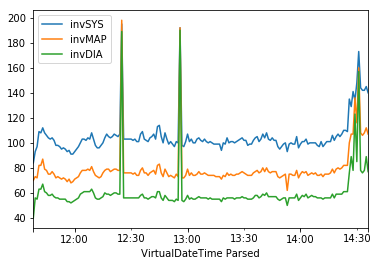

In [27]:
data[data["VirtualCaseID"]==10349].plot(x="VirtualDateTime Parsed", 
                                 y=["invSYS", "invMAP", "invDIA"])

### Do we need to drop data
#### Explore ``dropna`` with different values for ``how`

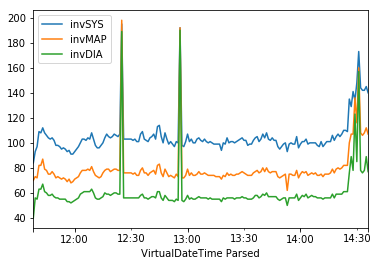

In [28]:
data[data["VirtualCaseID"]==10349].dropna(how="all").plot(x="VirtualDateTime Parsed", 
                                 y=["invSYS", "invMAP", "invDIA"])

## Data Cleansing  Filters
#### Consider the following two criteria for considering a measurement as spurious

1. x increases by more than 100 from one sample to the next
    * $|x_{i}-x_{i-1}| > 100$
1. x is lower than 10
    * $x_i < 10$
    
### Analysis

* The second condition should be easy for us to implement. We've aleady performed multiple examples of Boolean filtering.
* The first condition is more challenging because it requires taking differences between rows and to date we've only computed on single rows

### Approaches to Computing Differences

1. We could use the Pandas DataFrame [``shift``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html) method
1. We could use the Pandas DataFrame [``diff``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html) method

#### Shift Approach

In [ ]:
data["invSYS"] - data["invSYS"].shift(-1)

## Exercise: 
### Use the shift method to implement the maximum difference filter

#### Diff Method

In [ ]:
data["invSYS"].diff(-1)

## Exercise: 
### Use the diff method to implement the maximum difference filter

## Built-in Pandas Computational Tools
### Pandas provides a number of functions that for smoothing data that might be of value
#### [Window Functions](http://pandas.pydata.org/pandas-docs/stable/computation.html)
